In [45]:
import os
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
# # Collect all examples for the unity normalization
# indicies = np.arange(0, 485, 1)
# dataloader = DataLoader(MVTSDataset(indicies, norm_type='unity'), batch_size=485, drop_last=False)

In [ ]:
# x, _, label = next(iter(dataloader))

# x = x.numpy()
# label = label.numpy()

# # Resahpe into (batch * seq_length, feat_dim)
# x = x.reshape(x.shape[0] * x.shape[1], x.shape[2])
# x.shape


(19400, 35)

In [ ]:
# df = pd.read_csv('../data/long/1.csv')
# features = df.columns.tolist()
# features.remove('R_VALUE')
# features.remove('Unnamed: 0')
# len(features)

36

In [55]:
# Collect all data into a single pandas dataframe

dataframes = []
for file_name in os.listdir('../data/long/'):
    df = pd.read_csv('../data/long/' + file_name)
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop("R_VALUE", axis=1)
df.head()

,94,131,171,193,211,304,335,1600,1700,M_45s,...,MEANGBH,MEANJZH,TOTFY,MEANJZD,MEANALP,TOTFX,EPSY,EPSX,XR_MAX,target
0,2.918018,13.969911,369.098726,536.164432,218.309547,44.110328,9.737458,58.467420,841.730808,11.180648,...,43.304793,0.013500,-2.044535e+24,0.158671,0.037980,2.924329e+24,0.083483,-0.119407,5.421700e-07,1
1,2.911790,14.007880,370.015192,533.894009,217.293036,44.369353,9.724059,58.472574,843.415470,11.256843,...,43.481875,0.013258,-2.059398e+24,0.167709,0.037238,2.922138e+24,0.084189,-0.119457,5.482549e-07,1
2,2.949583,14.235638,370.676851,533.831950,217.638947,46.484114,9.713875,59.277822,844.331801,11.149372,...,43.658956,0.013016,-2.074260e+24,0.176747,0.036497,2.919948e+24,0.084895,-0.119507,5.543397e-07,1
3,3.283343,15.586344,380.975903,541.843027,220.404853,48.999401,9.899407,60.045933,844.739337,11.103078,...,43.696922,0.012826,-2.079820e+24,0.137492,0.035991,2.916506e+24,0.085127,-0.119373,6.350000e-07,1
4,4.198611,15.290191,369.267858,535.291171,218.931543,45.349041,10.267297,59.026293,842.802945,11.199798,...,43.727159,0.012640,-2.084862e+24,0.095555,0.035497,2.912995e+24,0.085333,-0.119228,7.198033e-07,1


In [1]:
sns.pairplot(df, hue='target');

In [64]:
# Normalize the data

df2 = df.copy()
df2 = df2.drop('target', axis=1)
data = df2.values
data_scaled = StandardScaler().fit_transform(data)

In [48]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(data_scaled)
embedding.shape

/Users/brandonlpanos/gits/mvts_transformer/envmvts/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


(14076, 2)

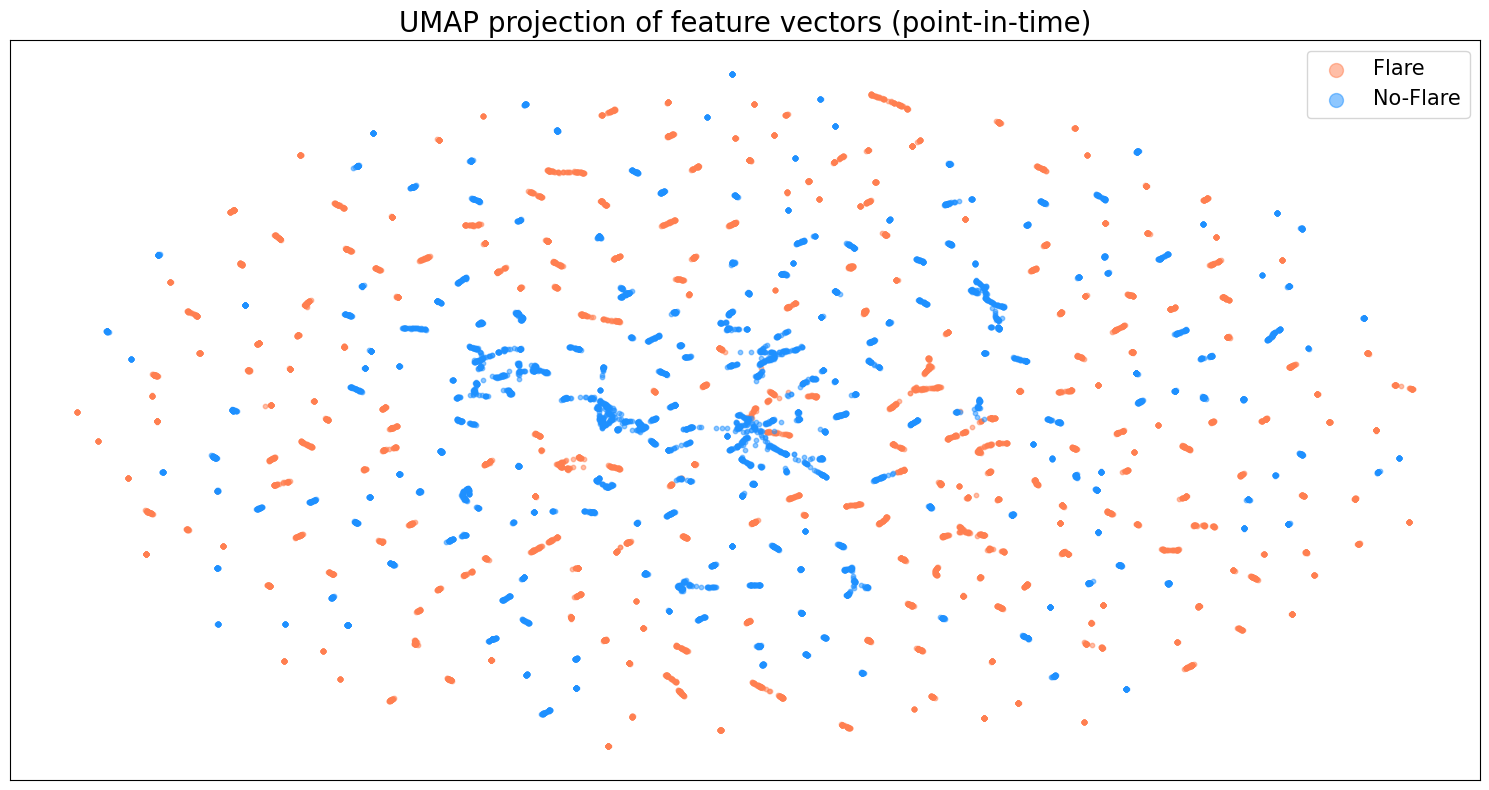

In [49]:
# Create Flare No-Flare masks
QS = df.target.to_numpy() == 0
FL = df.target.to_numpy() == 1

# plot the projected spectra
plt.figure(figsize=(15, 8))

plt.scatter(embedding[FL, 0], embedding[FL, 1], c="coral", s = 10, alpha=.5, label='Flare')  
plt.scatter(embedding[QS, 0], embedding[QS, 1], c='dodgerblue', s = 10, alpha=.5, label='No-Flare')

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title('UMAP projection of feature vectors (point-in-time)', fontsize=20)
lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=15)
lgnd.legend_handles[0]._sizes = [100]
lgnd.legend_handles[1]._sizes = [100]
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embedding = pca.fit(data_scaled).transform(data_scaled)

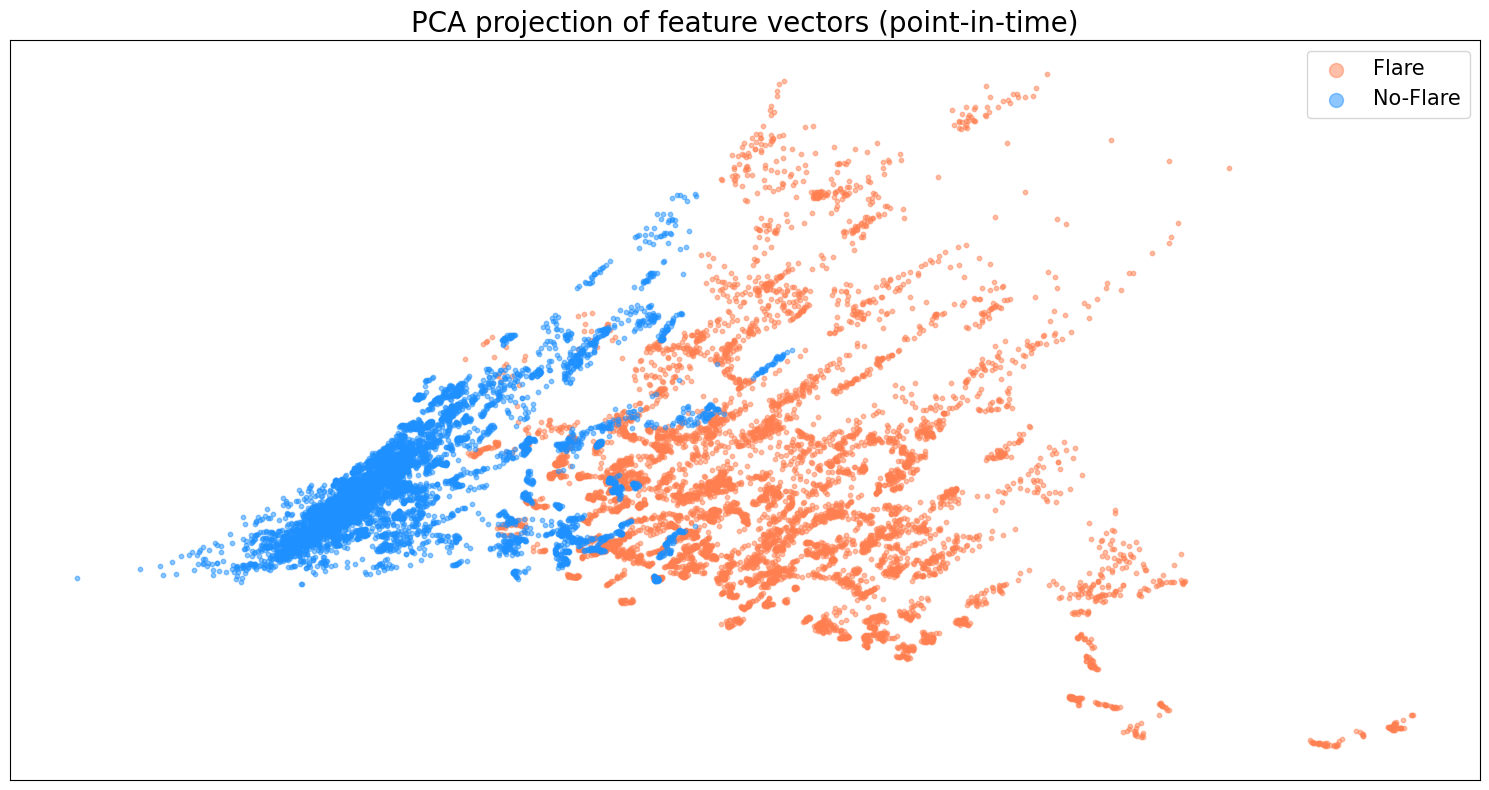

In [73]:
# Create Flare No-Flare masks
QS = df.target.to_numpy() == 0
FL = df.target.to_numpy() == 1

# plot the projected spectra
plt.figure(figsize=(15, 8))

plt.scatter(embedding[FL, 0], embedding[FL, 1], c="coral", s = 10, alpha=.5, label='Flare')  
plt.scatter(embedding[QS, 0], embedding[QS, 1], c='dodgerblue', s = 10, alpha=.5, label='No-Flare')

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title('PCA projection of feature vectors (point-in-time)', fontsize=20)
lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=15)
lgnd.legend_handles[0]._sizes = [100]
lgnd.legend_handles[1]._sizes = [100]
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [76]:
df.columns

Index(['94', '131', '171', '193', '211', '304', '335', '1600', '1700', 'M_45s',
       'V_45s', 'TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH', 'SAVNCPP',
       'USFLUX', 'TOTFZ', 'MEANPOT', 'EPSZ', 'MEANSHR', 'SHRGT45', 'MEANGAM',
       'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH', 'TOTFY', 'MEANJZD',
       'MEANALP', 'TOTFX', 'EPSY', 'EPSX', 'XR_MAX', 'target'],
      dtype='object')

In [106]:
from matplotlib import rcParams
from sklearn import preprocessing
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn import manifold, datasets
import matplotlib.gridspec as gridspec

def plot_feature_map(embedding, df, features_list):
    '''
    plot a random sample spectral data
    '''
    rcParams['font.family'] = 'serif'
    rcParams['font.size'] = 17
    
    fig = plt.figure(figsize=(25,15))
    gs = fig.add_gridspec(6, 6, wspace=0, hspace=0)

    for i in range(6):
        for j in range(6):
            ind = (i*6)+j
            feature = features_list[ind]
            ax = fig.add_subplot(gs[i, j])
            ax.scatter(embedding[:, 0], embedding[:, 1], c=df[feature].to_numpy(), s = .1, alpha=.5, label=feature, cmap='coolwarm')
            ax.legend(loc="best", shadow=False, scatterpoints=1)
            lgnd = ax.legend(loc="upper right", numpoints=1, fontsize=8)
            lgnd.legend_handles[0]._sizes = [50]
            ax.set_xticks([])
            ax.set_yticks([])
    plt.savefig('../figs/pca_standardized.png', bbox_inches='tight')
    plt.close()
    return None

ll = plot_feature_map(embedding, df, df.columns.tolist())

In [94]:
# plot the projected spectra
for feature in df.columns.tolist():
    plt.figure(figsize=(15, 5))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=df[feature].to_numpy(), s = 10, alpha=.5, label=feature, cmap='seismic')
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title('PCA projection of feature vectors (point-in-time)', fontsize=10)
    lgnd = plt.legend(loc="upper right", numpoints=1, fontsize=10)
    lgnd.legend_handles[0]._sizes = [100]
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

In [111]:
from sklearn.manifold import TSNE

n_components = 2
tsne = TSNE(n_components=n_components, init='random', perplexity=1500)
embedding = tsne.fit_transform(data_scaled)

In [112]:
from matplotlib import rcParams
from sklearn import preprocessing
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn import manifold, datasets
import matplotlib.gridspec as gridspec

def plot_feature_map(embedding, df, features_list):
    '''
    plot a random sample spectral data
    '''
    rcParams['font.family'] = 'serif'
    rcParams['font.size'] = 17
    
    fig = plt.figure(figsize=(25,15))
    gs = fig.add_gridspec(6, 6, wspace=0, hspace=0)
    for i in range(6):
        for j in range(6):
            ind = (i*6)+j
            feature = features_list[ind]
            ax = fig.add_subplot(gs[i, j])
            ax.scatter(embedding[:, 0], embedding[:, 1], c=df[feature].to_numpy(), s = .1, alpha=.5, label=feature, cmap='coolwarm')
            ax.legend(loc="best", shadow=False, scatterpoints=1)
            lgnd = ax.legend(loc="upper right", numpoints=1, fontsize=8)
            lgnd.legend_handles[0]._sizes = [50]
            ax.set_xticks([])
            ax.set_yticks([])
    plt.savefig('../figs/tsne_standardized.png', bbox_inches='tight')
    plt.close()
    return None

ll = plot_feature_map(embedding, df, df.columns.tolist())